# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [203]:
import pandas as pd
df = pd.read_csv('nss15.tsv', sep ="\t", error_bad_lines=False)

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


In [204]:
df.head(1)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT


### Check that your dataframe has 357727 rows and 19 columns.

In [205]:
df.shape

(357727, 19)

### List the columns and their data types

In [206]:
df.columns

Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

In [207]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

CPSC Case #     -  Case Number

trmt_date       -  Date of Treatment 

psu             -  int64

weight          -  Weight of Patient

stratum         -  object

age             -  Age of Patient

sex             -  Gender of Patient

race            -  Race and Ethnicity

race_other      -  Other Race and/or Ethnicity

diag            -  Diagnosis

diag_other      -  Diagnosis

body_part       -  Body Part Affected

disposition     -  Disposition of Case

location        -  Incident Locale

fmv             -  Fire Involvement

prod1           -  Product(s) Mentioned

prod2           -  Product(s) Mentioned

narr1           -  Comments

narr2           -  Comments

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [208]:
df['sex'].value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [209]:
df.sex[df.sex == 1] = 'Male'
df.sex[df.sex == 2] = 'Female'
df.sex[df.sex == 0] = 'Not_recorded'
df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [210]:
# Or
df.sex.replace(2, "Female", inplace=True)

# Or 
df.sex = df.sex.replace(2, "Female")

## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [211]:
df['sex'].value_counts()

Male            195071
Female          162654
Not_recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

In [212]:
%matplotlib inline

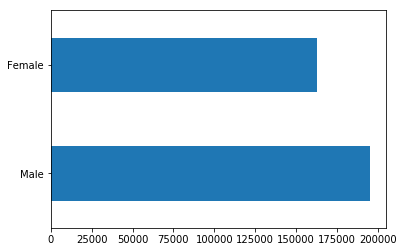

In [213]:
df[df.sex != 'Not_recorded'].sex.value_counts().plot(kind='barh')

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [228]:
import numpy as np
np.nan

nan

In [245]:
df.sex.replace("Not_recorded", np.nan, inplace=True)
df.sex.value_counts()

Male      195071
Female    162654
Name: sex, dtype: int64

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

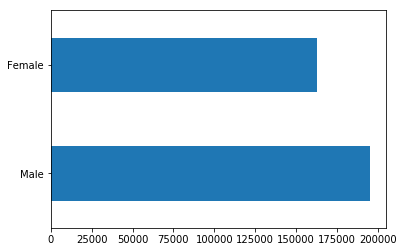

In [246]:
df.sex.value_counts().plot(kind='barh')

In [227]:
# what if I still care about NaN
#df.sex.value_counts(dropna = False)

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [225]:
df[(df.narr1.str.contains("PUNCH")) & (df.narr1.str.contains("WALL"))].head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."


In [226]:
# OR WITH REFULAR EXPRESSIONS for fall off bike
#df[df.narr1.str.contains("F[AE]LL.*BI[CK]")]

In [116]:
# how to sort using groupby
# df.groupby('body_part')['age'].mean().sort_index()
# df.groupby('body_part')['age'].mean().sort_values()

In [117]:
wall_df = df[df.narr1.str.contains("PUNCH.*WALL.*")]
wall_df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."


## Graph the gender distribution of wall-punching.

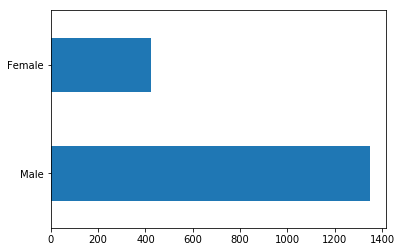

In [118]:
wall_df['sex'].value_counts().plot(kind ='barh')

In [119]:
# what month did this happen 07/1//2015 July! 
# of i.e. Orlando, Florida (I just want the state)
# create a new column
# df.trmt_date.str.extract?
# df.trmt_date.str.extract("\d(\d)") ==== give me the second number
# df.narr1.str.extract("FELL OFF (\w+)").dropna()
# PUT PARENTHESIS AROUND WHAT YOU WANT TO KEEP 

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [120]:
wall_df['age'].mean()

24.303611738148984

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [121]:
month_df = wall_df.trmt_date.str.extract("(\d\d)/\d\d/\d\d\d\d")
month_df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


246    05
582    09
604    04
704    10
741    04
Name: trmt_date, dtype: object

In [122]:
month_df.value_counts().head()

09    175
06    170
05    162
10    162
04    156
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

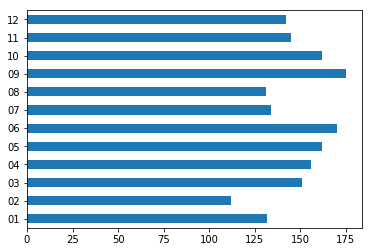

In [123]:
month_df.value_counts().sort_index().plot(kind='barh')

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

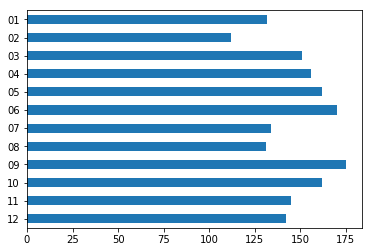

In [124]:
month_df.value_counts().sort_index(ascending= False).plot(kind='barh')

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [125]:
df.prod1.value_counts().head()

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
Name: prod1, dtype: int64

In [126]:
df['prod1'] = df.prod1.astype(str).str.pad(4, fillchar ='0')

In [127]:
df['prod2'] = df.prod1.astype(str).str.pad(4, fillchar ='0')

In [128]:
df[df['prod1'] == '0381']['trmt_date'].str.extract("(\d\d)/\d\d/\d\d\d\d").value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


07    45
06    43
08    42
09    36
10    32
05    32
04    17
12    17
11    15
03    14
02     9
01     8
Name: trmt_date, dtype: int64

In [129]:
#df.race_other.value_counts()
#df.race_other.replace("UNKN", "UNKNOWN")
#df[df.race_other.str.contains("UN.*N", na = False)]['race_other'].value_counts()
#df.race_other = df.race_other.str.replace("UN.*N", "UNKNOWN")

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [130]:
punch_df = df[(df.narr1.str.contains("PUNCH.*")) | (df.narr1.str.contains("PUNCH.*"))]
punch_df['prod1'].value_counts().head()

1884    1796
1894     566
1893     244
1207     159
4004     122
Name: prod1, dtype: int64

In [131]:
punch_df['prod2'].value_counts().head()

1884    1796
1894     566
1893     244
1207     159
4004     122
Name: prod2, dtype: int64

In [132]:
#People also punched:
# 1894,"Windows and window glass, other than storm windows"
# 1893,"Doors, other or not specified"
# 1207,"Boxing (activity, apparel or equipment)"

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [133]:
df.prod1 = df.prod1.replace(np.nan, '0000')
df.prod2 = df.prod2.replace(np.nan, '0000')
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,1267,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,1439,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,3274,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,0611,0611,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1893,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [134]:
df['prod1'].value_counts().add(df['prod2'].value_counts(), fill_value=0).head()

1842    57218
1807    56510
4076    33414
1205    28190
5040    25474
dtype: int64

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [135]:
df_2 = df['prod1'].value_counts().add(df['prod2'].value_counts(), fill_value=0).reset_index()
df_2.head()

,index,0
0,1842,57218
1,1807,56510
2,4076,33414
3,1205,28190
4,5040,25474


In [136]:
df_2.columns = ['product_code', 'injury_count']
df_2.head()

,product_code,injury_count
0,1842,57218
1,1807,56510
2,4076,33414
3,1205,28190
4,5040,25474


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [178]:
df.prod1.astype(str).str.pad(4, fillchar='0').head()

0    1267
1    1439
2    3274
3    0611
4    1893
Name: prod1, dtype: object

## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [179]:
df_3 = pd.read_csv('categories-cleaned.txt', sep =",", names = ("code", "description"))
df_3.code = df_3.code.astype(str).str.pad(4, fillchar='0')

In [180]:
df_3.head()

,code,description
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories


In [181]:
df.head(1)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,1267,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT


In [249]:
df_4 = df_2.merge(df_3, left_on='product_code', right_on='code')
df_4.drop('product_code', axis=1, inplace=True)
df_4.head()

,injury_count,code,description
0,57218,1842,Stairs or steps (excluding pull-down and foldi...
1,56510,1807,Floors or flooring materials
2,33414,4076,"Beds or bedframes, other or not specified"
3,28190,1205,"Basketball (activity, apparel or equipment)"
4,25474,5040,Bicycles or accessories (excluding mountain or...


## Graph the top 10 most popular products for injuries 

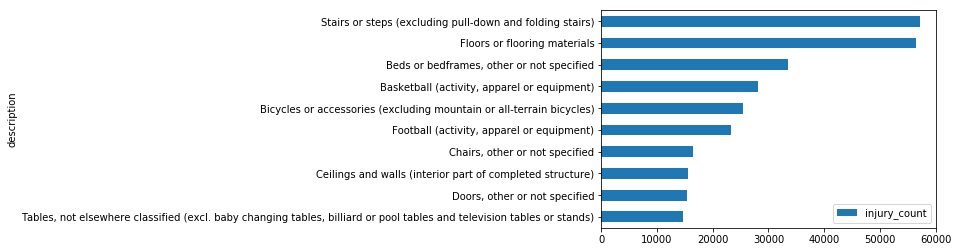

In [146]:
df_4.head(10).sort_index(ascending= False).plot(kind='barh', x='description')